<a href="https://colab.research.google.com/github/NayanDharviya/Aerofit_Trademill_Case_study/blob/main/Aerofit_Trademill_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('aerofit_treadmill.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.shape

(180, 9)

In [ ]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000



Univariate Analysis
1.   Age
2.   Education
3. Usage
4. Fitness
5. Income
6. Miles



In [ ]:
#

<Axes: xlabel='Miles', ylabel='Count'>

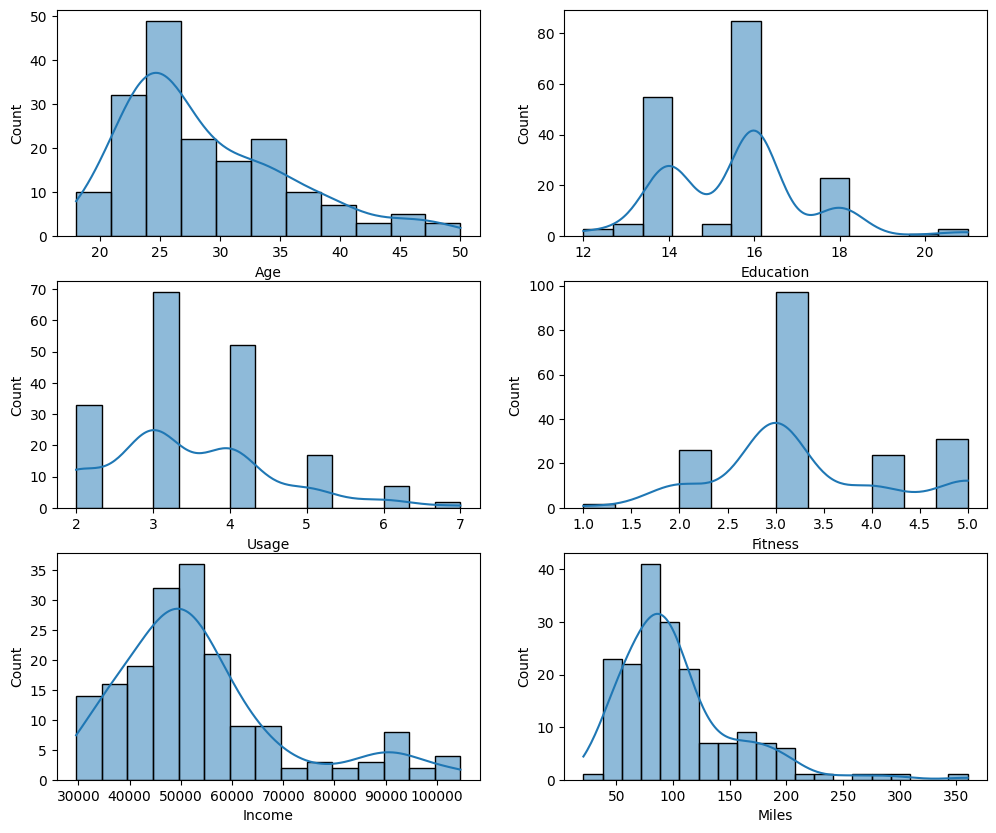

In [ ]:
fig, axis = plt.subplots(3,2,figsize=(12,10))

sns.histplot(x='Age', data=data, kde=True, ax=axis[0,0])
sns.histplot(x='Education', data=data, kde=True, ax=axis[0,1])
sns.histplot(x='Usage', data=data, kde=True, ax=axis[1,0])
sns.histplot(x='Fitness', data=data, kde=True, ax=axis[1,1])
sns.histplot(x='Income', data=data, kde=True, ax=axis[2,0])
sns.histplot(x='Miles', data=data, kde=True, ax=axis[2,1])

<Axes: xlabel='Gender', ylabel='count'>

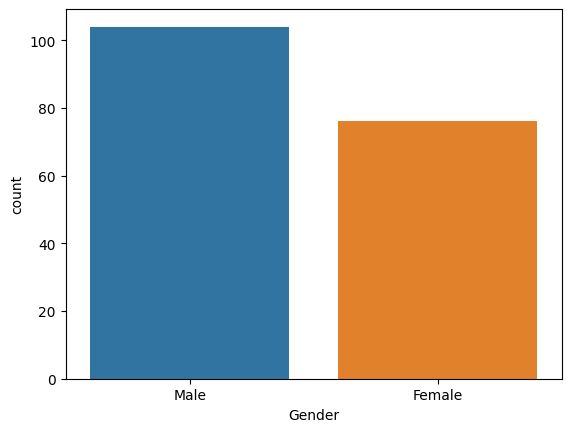

In [ ]:
sns.countplot(x='Gender', data=data)

<Axes: xlabel='Miles'>

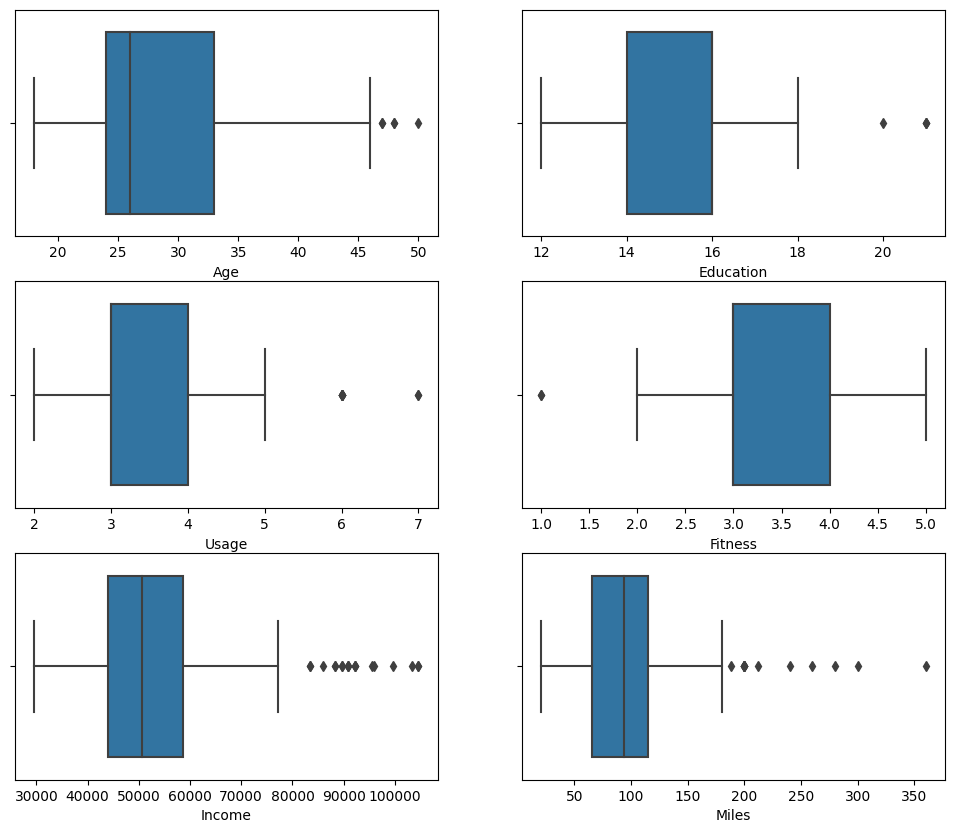

In [ ]:
# Outlier detection
fig, axis = plt.subplots(3,2,figsize=(12,10))

sns.boxplot(x='Age', data=data, ax=axis[0,0])
sns.boxplot(x='Education', data=data, ax=axis[0,1])
sns.boxplot(x='Usage', data=data, ax=axis[1,0])
sns.boxplot(x='Fitness', data=data, ax=axis[1,1])
sns.boxplot(x='Income', data=data, ax=axis[2,0])
sns.boxplot(x='Miles', data=data, ax=axis[2,1])



*   Aerofit data has 180 rows and 9 columns
*   There are no null/missing values in the given data

*   There are 3 unique products listed as:- KP281', 'KP481', 'KP781'
*   KP281 has the highest number of sale


*   There is the age range between 20-27, who has bought the more number of trademills
*   There are more number of male in compare of female


*   The Age range is from 18-24 i.e minimum is 18 and maximum is 24
*   The mean/avg Income is 53719.57 in $ and the minimum Income is > 25$

*   More than 75% having 16 years of education
*   There are too many outliers in Income, Miles features











In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

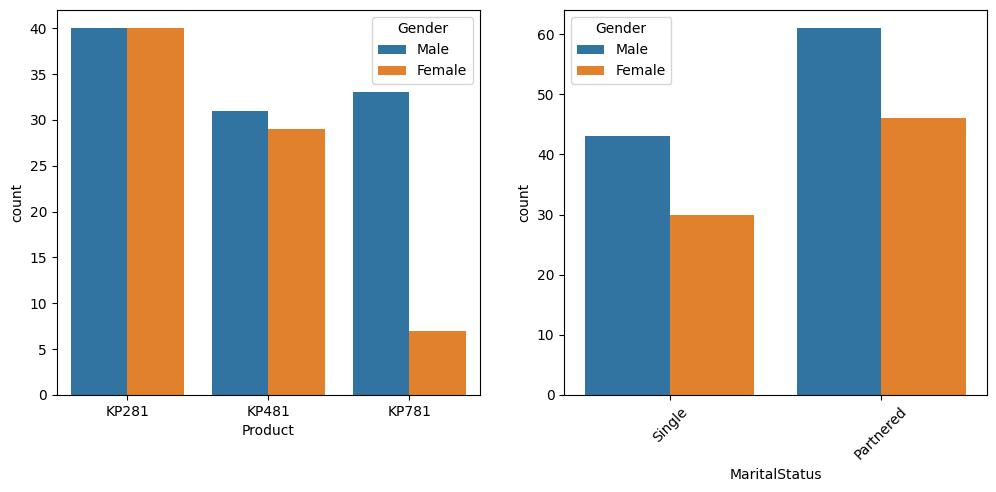

In [ ]:
# bivariate Analysis

fig, axis = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(x='Product', hue='Gender', data=data, ax=axis[0])
sns.countplot(x='MaritalStatus', hue='Gender', data=data, ax=axis[1])
plt.xticks(rotation=45)
plt.show()



*   Product KP781 has bias result that male are more intersted to purchase this product as compare to female
*   Partenered Persons are more likely to purchase the product



In [ ]:
data.groupby(['Product','Gender'])['Gender'].count()

Product  Gender
KP281    Female    40
         Male      40
KP481    Female    29
         Male      31
KP781    Female     7
         Male      33
Name: Gender, dtype: int64

In [ ]:
# Conditional Probabilities
# Probability of each product given gender
def p_prod_given_gender(gender, print_marginal=False):

    df1 = pd.crosstab(index=data['Gender'], columns=[data['Product']])
    print(df1)
    print(df1['KP781'][gender])
    print(df1.loc[gender].sum())
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33
33
104
P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33
7
76
P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



**Business Recommandation**


1.   Have to focus on the products/trademills KP781, and have to find what it makes the female more attract
2.   Marital are more used to this products, so focus on the area/location where more number of marital peoples are leaving rather than near to school, college etc.
3. Have to make a buget friendly equipment so the person who has lower income can also the buy the products.

